# Used Car Sales Analysis

Purpose: Clean and analyze the used car listings

Dataset: Sample from the original Kaggle dataset. The data was cralwed from eBay Kleinanzeigen, a classified section of the German eBay website.


## Data Dictionary

- ***dateCrawled*** - When this ad was first crawled. All field-values are taken from this date.
- ***name*** - Name of the car.
- ***seller*** - Whether the seller is private or a dealer.
- ***offerType*** - The type of listing
- ***price*** - The price on the ad to sell the car.
- ***abtest*** - Whether the listing is included in an A/B test.
- ***vehicleType*** - The vehicle Type.
- ***yearOfRegistration*** - The year in which the car was first registered.
- ***gearbox*** - The transmission type.
- ***powerPS*** - The power of the car in PS.
- ***model*** - The car model name.
- ***kilometer*** - How many kilometers the car has driven.
- ***monthOfRegistration*** - The month in which the car was first registered.
- ***fuelType*** - What type of fuel the car uses.
- ***brand*** - The brand of the car.
- ***notRepairedDamage*** - If the car has a damage which is not yet repaired.
- ***dateCreated*** - The date on which the eBay listing was -created.
- ***nrOfPictures*** - The number of pictures in the ad.
- ***postalCode*** - The postal code for the location of the vehicle.
- ***lastSeenOnline*** - When the crawler saw this ad last online.

## Data Load

In [161]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib as mtl
import seaborn as sns
import re
%matplotlib inline  

In [2]:
# Load data file into memory
file = './autos.csv'
autos = pd.read_csv(file,encoding = 'Latin-1')

In [3]:
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In [4]:
autos.tail()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
49995,2016-03-27 14:38:19,Audi_Q5_3.0_TDI_qu._S_tr.__Navi__Panorama__Xenon,privat,Angebot,"$24,900",control,limousine,2011,automatik,239,q5,"100,000km",1,diesel,audi,nein,2016-03-27 00:00:00,0,82131,2016-04-01 13:47:40
49996,2016-03-28 10:50:25,Opel_Astra_F_Cabrio_Bertone_Edition___TÜV_neu+...,privat,Angebot,"$1,980",control,cabrio,1996,manuell,75,astra,"150,000km",5,benzin,opel,nein,2016-03-28 00:00:00,0,44807,2016-04-02 14:18:02
49997,2016-04-02 14:44:48,Fiat_500_C_1.2_Dualogic_Lounge,privat,Angebot,"$13,200",test,cabrio,2014,automatik,69,500,"5,000km",11,benzin,fiat,nein,2016-04-02 00:00:00,0,73430,2016-04-04 11:47:27
49998,2016-03-08 19:25:42,Audi_A3_2.0_TDI_Sportback_Ambition,privat,Angebot,"$22,900",control,kombi,2013,manuell,150,a3,"40,000km",11,diesel,audi,nein,2016-03-08 00:00:00,0,35683,2016-04-05 16:45:07
49999,2016-03-14 00:42:12,Opel_Vectra_1.6_16V,privat,Angebot,"$1,250",control,limousine,1996,manuell,101,vectra,"150,000km",1,benzin,opel,nein,2016-03-13 00:00:00,0,45897,2016-04-06 21:18:48


In [5]:
autos.shape

(50000, 20)

All data seems to be loaded.

## Cleaning Columns Names

yearOfRegistration, monthOfRegistration, notRepairDamage, and dateCreate are either wordy or unclear what they mean. Let's change it to something more clearler and less wordy

- yearOfRegistration to registration_year 
- monthOfRegistration to registration_month
- notRepairedDamage to unrepaired_damage
- dateCreated to ad_created
- The rest of the columnn names from camelcase to snakecase.

In [6]:
# See column names

autos.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [7]:
autos.columns = ['date_crawled', 'name', 'seller', 'offer_type', 'price', 'abtest',
                 'vehicle_type', 'registration_year', 'gearbox', 'power_ps', 'model',
                 'odometer', 'registration_month', 'fuelType', 'brand',
                 'unrepaired_damage', 'ad_created', 'nr_of_pictures', 'postal_code','last_seen'
                ]

## Initial Exploration and Cleaning

Let's take a quick glance on the data


In [8]:
autos.describe()

,registration_year,power_ps,registration_month,nr_of_pictures,postal_code
count,50000.000000,50000.000000,50000.000000,50000.0,50000.000000
mean,2005.073280,116.355920,5.723360,0.0,50813.627300
std,105.712813,209.216627,3.711984,0.0,25779.747957
min,1000.000000,0.000000,0.000000,0.0,1067.000000
25%,1999.000000,70.000000,3.000000,0.0,30451.000000
50%,2003.000000,105.000000,6.000000,0.0,49577.000000
75%,2008.000000,150.000000,9.000000,0.0,71540.000000
max,9999.000000,17700.000000,12.000000,0.0,99998.000000


looks like nr_of_pictures have mostly one value. Let's find out if that's the case.

In [9]:
autos['nr_of_pictures'].value_counts()

0    50000
Name: nr_of_pictures, dtype: int64

The columns has all 0s for its value. It's either crawled wrong, or they really didn't have any pictures in the ad. Either case, it doesn't differentiate the data. We could drop it

Registration Year also needs more evaluation because year 9999 hasn't come yet and year 1000 was even before car was invented. There are other suspicious data points. We will have to decide what to do about it later on. 

In [11]:
autos['registration_year'].value_counts().head()

2000    3354
2005    3015
1999    3000
2004    2737
2003    2727
Name: registration_year, dtype: int64

Also power PS zero is not valid value. Need further investigation. The minimum value of postal code also doesn't look like it conforms with other values. 4 digits instead of 5. 


Price and odometer are numeric but stored as text. Let's change it.

To summarize:

- nr of pictures have only one value. 0
- registration_year and postal code have some suspicious values
- price and odometer have text values instead of numbers.
- odometer is in km. We will change the column name to odometer_km


In [27]:
autos.rename({'odometer': 'odometer_km'}, axis = 1, inplace=True)

In [35]:
autos['price'] = autos['price'].apply(lambda x: re.sub("[^0-9]", "", x))
autos['odometer_km'] = autos['odometer_km'].apply(lambda x: re.sub("[^0-9]", "", x))

In [37]:
autos['price'] = pd.to_numeric(autos['price'])
autos['odometer_km'] = pd.to_numeric(autos['odometer_km'])

In [39]:
autos.describe()

,price,registration_year,power_ps,odometer_km,registration_month,nr_of_pictures,postal_code
count,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.0,50000.000000
mean,9.840044e+03,2005.073280,116.355920,125732.700000,5.723360,0.0,50813.627300
std,4.811044e+05,105.712813,209.216627,40042.211706,3.711984,0.0,25779.747957
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1.100000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30451.000000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49577.000000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71540.000000
max,1.000000e+08,9999.000000,17700.000000,150000.000000,12.000000,0.0,99998.000000


## Exploring the Odometer and Price Columns

In [41]:
autos['price'].unique().shape

(2357,)

In [42]:
autos['price'].describe()

count    5.000000e+04
mean     9.840044e+03
std      4.811044e+05
min      0.000000e+00
25%      1.100000e+03
50%      2.950000e+03
75%      7.200000e+03
max      1.000000e+08
Name: price, dtype: float64

In [45]:
autos['price'].value_counts().sort_index(ascending = False)

99999999       1
27322222       1
12345678       3
11111111       2
10000000       1
3890000        1
1300000        1
1234566        1
999999         2
999990         1
350000         1
345000         1
299000         1
295000         1
265000         1
259000         1
250000         1
220000         1
198000         1
197000         1
194000         1
190000         1
180000         1
175000         1
169999         1
169000         1
163991         1
163500         1
155000         1
151990         1
            ... 
66             1
65             5
60             9
59             1
55             2
50            49
49             4
47             1
45             4
40             6
35             1
30             7
29             1
25             5
20             4
18             1
17             3
15             2
14             1
13             2
12             3
11             2
10             7
9              1
8              1
5              2
3              1
2             

It looks like there are quite few outliers

- Car price more than 350,000. Realistically, if the price is that high, it would be on somewhere else not ebay.
- Car price under 1,000. Unlikely any car would be sold under 1,000 unless it's not functional

In [74]:
price_between = autos['price'].between(1000,350000)

In [47]:
autos[price_between].describe()

,price,registration_year,power_ps,odometer_km,registration_month,nr_of_pictures,postal_code
count,38626.000000,38626.000000,38626.000000,38626.000000,38626.000000,38626.0,38626.000000
mean,7255.376275,2005.679801,128.915653,122778.568840,5.998783,0.0,51690.789908
std,9698.439853,86.685138,215.891372,40796.873127,3.591067,0.0,25688.835036
min,1000.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,2200.000000,2001.000000,80.000000,100000.000000,3.000000,0.0,31224.000000
50%,4350.000000,2005.000000,116.000000,150000.000000,6.000000,0.0,50858.000000
75%,8950.000000,2009.000000,160.000000,150000.000000,9.000000,0.0,72534.000000
max,350000.000000,9999.000000,17700.000000,150000.000000,12.000000,0.0,99998.000000


We ommitted about 12,000 record and it gives us more reasonable price range.

In [48]:
autos['odometer_km'].unique().shape

(13,)

In [50]:
autos['odometer_km'].describe()

count     50000.000000
mean     125732.700000
std       40042.211706
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: odometer_km, dtype: float64

In [51]:
autos['odometer_km'].value_counts().sort_index(ascending = False)

150000    32424
125000     5170
100000     2169
90000      1757
80000      1436
70000      1230
60000      1164
50000      1027
40000       819
30000       789
20000       784
10000       264
5000        967
Name: odometer_km, dtype: int64

odometer values looks actually pretty normal and not many extreme values

## Exploring the date columns

let's look at date_crawled, ad_created, and last_seen

In [52]:
autos[['date_crawled','ad_created','last_seen']][0:5]

,date_crawled,ad_created,last_seen
0,2016-03-26 17:47:46,2016-03-26 00:00:00,2016-04-06 06:45:54
1,2016-04-04 13:38:56,2016-04-04 00:00:00,2016-04-06 14:45:08
2,2016-03-26 18:57:24,2016-03-26 00:00:00,2016-04-06 20:15:37
3,2016-03-12 16:58:10,2016-03-12 00:00:00,2016-03-15 03:16:28
4,2016-04-01 14:38:50,2016-04-01 00:00:00,2016-04-01 14:38:50


In [56]:
autos[['date_crawled','ad_created','last_seen']].dtypes

date_crawled    object
ad_created      object
last_seen       object
dtype: object

They include time as well. Also they are in object time instead of date or numeric. To look at their distribution by day, let's cut them by 10 to extract year-month-day.

In [58]:
print(autos['date_crawled'].str[:10])
print(autos['ad_created'].str[:10])
print(autos['last_seen'].str[:10])

0        2016-03-26
1        2016-04-04
2        2016-03-26
3        2016-03-12
4        2016-04-01
5        2016-03-21
6        2016-03-20
7        2016-03-16
8        2016-03-22
9        2016-03-16
10       2016-03-15
11       2016-03-16
12       2016-03-31
13       2016-03-23
14       2016-03-23
15       2016-04-01
16       2016-03-16
17       2016-03-29
18       2016-03-26
19       2016-03-17
20       2016-03-05
21       2016-03-06
22       2016-03-28
23       2016-03-10
24       2016-04-03
25       2016-03-21
26       2016-04-03
27       2016-03-27
28       2016-03-19
29       2016-04-02
            ...    
49970    2016-03-21
49971    2016-03-29
49972    2016-03-26
49973    2016-03-27
49974    2016-03-20
49975    2016-03-27
49976    2016-03-19
49977    2016-03-31
49978    2016-04-04
49979    2016-03-20
49980    2016-03-12
49981    2016-03-15
49982    2016-03-29
49983    2016-03-06
49984    2016-03-31
49985    2016-04-02
49986    2016-04-04
49987    2016-03-22
49988    2016-03-28


In [60]:
autos['date_crawled'].str[:10].value_counts(normalize = True, dropna = False).sort_index()

2016-03-05    0.02538
2016-03-06    0.01394
2016-03-07    0.03596
2016-03-08    0.03330
2016-03-09    0.03322
2016-03-10    0.03212
2016-03-11    0.03248
2016-03-12    0.03678
2016-03-13    0.01556
2016-03-14    0.03662
2016-03-15    0.03398
2016-03-16    0.02950
2016-03-17    0.03152
2016-03-18    0.01306
2016-03-19    0.03490
2016-03-20    0.03782
2016-03-21    0.03752
2016-03-22    0.03294
2016-03-23    0.03238
2016-03-24    0.02910
2016-03-25    0.03174
2016-03-26    0.03248
2016-03-27    0.03104
2016-03-28    0.03484
2016-03-29    0.03418
2016-03-30    0.03362
2016-03-31    0.03192
2016-04-01    0.03380
2016-04-02    0.03540
2016-04-03    0.03868
2016-04-04    0.03652
2016-04-05    0.01310
2016-04-06    0.00318
2016-04-07    0.00142
Name: date_crawled, dtype: float64

Distribution of crawling data is from 2016-03-05 to 2016-04-07

In [61]:
autos['ad_created'].str[:10].value_counts(normalize = True, dropna = False).sort_index()

2015-06-11    0.00002
2015-08-10    0.00002
2015-09-09    0.00002
2015-11-10    0.00002
2015-12-05    0.00002
2015-12-30    0.00002
2016-01-03    0.00002
2016-01-07    0.00002
2016-01-10    0.00004
2016-01-13    0.00002
2016-01-14    0.00002
2016-01-16    0.00002
2016-01-22    0.00002
2016-01-27    0.00006
2016-01-29    0.00002
2016-02-01    0.00002
2016-02-02    0.00004
2016-02-05    0.00004
2016-02-07    0.00002
2016-02-08    0.00002
2016-02-09    0.00004
2016-02-11    0.00002
2016-02-12    0.00006
2016-02-14    0.00004
2016-02-16    0.00002
2016-02-17    0.00002
2016-02-18    0.00004
2016-02-19    0.00006
2016-02-20    0.00004
2016-02-21    0.00006
               ...   
2016-03-09    0.03324
2016-03-10    0.03186
2016-03-11    0.03278
2016-03-12    0.03662
2016-03-13    0.01692
2016-03-14    0.03522
2016-03-15    0.03374
2016-03-16    0.03000
2016-03-17    0.03120
2016-03-18    0.01372
2016-03-19    0.03384
2016-03-20    0.03786
2016-03-21    0.03772
2016-03-22    0.03280
2016-03-23

ad_created has more spread value than crawled date which is understandable

In [62]:
autos['last_seen'].str[:10].value_counts(normalize = True, dropna = False).sort_index()

2016-03-05    0.00108
2016-03-06    0.00442
2016-03-07    0.00536
2016-03-08    0.00760
2016-03-09    0.00986
2016-03-10    0.01076
2016-03-11    0.01252
2016-03-12    0.02382
2016-03-13    0.00898
2016-03-14    0.01280
2016-03-15    0.01588
2016-03-16    0.01644
2016-03-17    0.02792
2016-03-18    0.00742
2016-03-19    0.01574
2016-03-20    0.02070
2016-03-21    0.02074
2016-03-22    0.02158
2016-03-23    0.01858
2016-03-24    0.01956
2016-03-25    0.01920
2016-03-26    0.01696
2016-03-27    0.01602
2016-03-28    0.02086
2016-03-29    0.02234
2016-03-30    0.02484
2016-03-31    0.02384
2016-04-01    0.02310
2016-04-02    0.02490
2016-04-03    0.02536
2016-04-04    0.02462
2016-04-05    0.12428
2016-04-06    0.22100
2016-04-07    0.13092
Name: last_seen, dtype: float64

Let's do the same thing for registration_year

In [63]:
autos['registration_year'].describe()

count    50000.000000
mean      2005.073280
std        105.712813
min       1000.000000
25%       1999.000000
50%       2003.000000
75%       2008.000000
max       9999.000000
Name: registration_year, dtype: float64

## Dealing with Incorrect Registration Year Data

Revisiting where we left off, there is definately incorrect data in registration year. Two obvious ones are

1. The minimum value is 1000. It's before cars were invented
2. The maximum value is 9999. The data was collected in 2016. You can register car for the future

In [70]:
reg_year_between = autos['registration_year'].between(1900,2016)

In [71]:
autos[reg_year_between].shape

(48028, 20)

that removed about 2,000 data points and the distribution looks little more realistic. 

In [73]:
autos.loc[reg_year_between,'registration_year'].value_counts(normalize = True).sort_index(ascending = False)

2016    0.027401
2015    0.008308
2014    0.013867
2013    0.016782
2012    0.027546
2011    0.034022
2010    0.033251
2009    0.043683
2008    0.046452
2007    0.047972
2006    0.056384
2005    0.062776
2004    0.056988
2003    0.056779
2002    0.052740
2001    0.056280
2000    0.069834
1999    0.062464
1998    0.051074
1997    0.042225
1996    0.030066
1995    0.027338
1994    0.013742
1993    0.009265
1992    0.008141
1991    0.007412
1990    0.008224
1989    0.003769
1988    0.002957
1987    0.001562
          ...   
1968    0.000541
1967    0.000562
1966    0.000458
1965    0.000354
1964    0.000250
1963    0.000187
1962    0.000083
1961    0.000125
1960    0.000708
1959    0.000146
1958    0.000083
1957    0.000042
1956    0.000104
1955    0.000042
1954    0.000042
1953    0.000021
1952    0.000021
1951    0.000042
1950    0.000062
1948    0.000021
1943    0.000021
1941    0.000042
1939    0.000021
1938    0.000021
1937    0.000083
1934    0.000042
1931    0.000021
1929    0.0000

## Exploring Price by Brand

from now on, let's use the data that outliers are excluded.

In [75]:
autos_trimmed = autos[price_between & reg_year_between]

In [76]:
autos_trimmed.shape

(37206, 20)

Top 10 most frequently registered brand. Now based on the list of the brand, I'm going to calculated their average price.

In [138]:
top_10_brand = autos_trimmed['brand'].value_counts()[0:10]
autos_trimmed['brand'].value_counts()[0:10]

volkswagen       7843
bmw              4664
mercedes_benz    4152
audi             3631
opel             3314
ford             2184
renault          1387
peugeot          1038
fiat              784
skoda             709
Name: brand, dtype: int64

In [139]:
avg_price_list = {}

In [140]:
for index in top_10_brand.index:
    mean = autos_trimmed.loc[autos_trimmed['brand'] == index, 'price'].mean()
    avg_price_list[index] = mean
        

In [141]:
sorted(avg_price_list.items(), key=lambda kv: kv[1])

[('renault', 3590.942321557318),
 ('peugeot', 3955.169556840077),
 ('fiat', 4008.174744897959),
 ('opel', 4219.954737477368),
 ('ford', 5331.478021978022),
 ('volkswagen', 6645.13260232054),
 ('skoda', 6836.696755994359),
 ('bmw', 9119.20218696398),
 ('mercedes_benz', 9302.614402697494),
 ('audi', 10322.269347287249)]

From the list above, Audi, Mercedes Benz, and BMW are the 3 most expesive brand in the data set. Renault, Peugeot, and Fiat are the least expensive.

## Exploring Mileage by Brand

In [151]:
autos_trimmed.columns

Index(['date_crawled', 'name', 'seller', 'offer_type', 'price', 'abtest',
       'vehicle_type', 'registration_year', 'gearbox', 'power_ps', 'model',
       'odometer_km', 'registration_month', 'fuelType', 'brand',
       'unrepaired_damage', 'ad_created', 'nr_of_pictures', 'postal_code',
       'last_seen'],
      dtype='object')

In [152]:
avg_odometer_list = {}

In [153]:
for index in top_10_brand.index:
    mean = autos_trimmed.loc[autos_trimmed['brand'] == index, 'odometer_km'].mean()
    avg_odometer_list[index] = mean

In [154]:
sorted(avg_odometer_list.items(), key=lambda kv: kv[1])

[('fiat', 107901.78571428571),
 ('skoda', 110063.46967559944),
 ('ford', 119619.96336996337),
 ('renault', 121423.93655371305),
 ('peugeot', 122341.04046242774),
 ('opel', 123952.92697646348),
 ('volkswagen', 125765.65089889073),
 ('audi', 127491.04929771413),
 ('mercedes_benz', 130062.6204238921),
 ('bmw', 132001.50085763293)]

## Storing Aggregate Data in a DataFrame

In [156]:
avg_price_series = pd.Series(avg_price_list)
df = pd.DataFrame(avg_price_series, columns = ['Mean Price'])
df

,Mean Price
audi,10322.269347
bmw,9119.202187
fiat,4008.174745
ford,5331.478022
mercedes_benz,9302.614403
opel,4219.954737
peugeot,3955.169557
renault,3590.942322
skoda,6836.696756
volkswagen,6645.132602


In [157]:
avg_odometer_series = pd.Series(avg_odometer_list)
df['Mean Mileage'] = avg_odometer_series
df

,Mean Price,Mean Mileage
audi,10322.269347,127491.049298
bmw,9119.202187,132001.500858
fiat,4008.174745,107901.785714
ford,5331.478022,119619.963370
mercedes_benz,9302.614403,130062.620424
opel,4219.954737,123952.926976
peugeot,3955.169557,122341.040462
renault,3590.942322,121423.936554
skoda,6836.696756,110063.469676
volkswagen,6645.132602,125765.650899


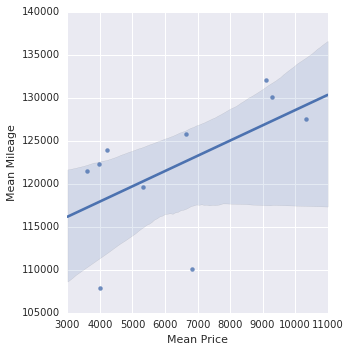

In [162]:
sns.lmplot(data = df, x = 'Mean Price', y = 'Mean Mileage')

This is surprising however, it looks like there are positive relationship between average odometer and average price. 